In [1]:
import numpy as np
from pfe import Mesh, Model, Constant, Vector
from pfe.interpolation import Lagrange2
from pfe.models import lpe_2d

freq = 1.2
num_modes = 5
mode_m = 1

omega = 2*np.pi*freq

mesh = Mesh('duct.msh', num_dim=2)

model = Model()

model.parameters['omega'] = Constant(omega)
model.parameters['rho0'] = Constant(1.0)
model.parameters['c0'] = Constant(1.0)
model.parameters['u0'] = Constant(0.0)
model.parameters['v0'] = Constant(0.0)

model.fields['phi'] = Lagrange2(mesh)
model.fields['R'] = Vector(num_modes)
model.fields['T'] = Vector(num_modes)
A_in = np.zeros((num_modes,))
A_in[mode_m] = 1.0

model.terms.append(lpe_2d.Main(mesh.group(0)))
model.terms.append(lpe_2d.Wall(mesh.group([1, 3])))
model.terms.append(lpe_2d.DuctModes(mesh.group(4), 'R', A_in))
model.terms.append(lpe_2d.DuctModes(mesh.group(2), 'T'))

model.declare_fields()
model.build()
model.solve()

Opening mesh duct.msh
Reading 46921 nodes
Reading elements...
* 500 elements Line 3
* 23210 elements Triangle 6
Reading groups...
* group 0: 23210 elements
* group 1: 200 elements
* group 2: 50 elements
* group 3: 200 elements
* group 4: 50 elements

Allocating fields...
* Field phi: 46921 DOFs
* Field R: 5 DOFs
* Field T: 5 DOFs
Total: 46931 DOFs

Building model...
* Group Main
* Group Wall
* Group DuctModes
* Group DuctModes
Time: 3.6574s
Global system: 46931 DOFs, 537901 non-zero entries

Solving model...
Time: 1.8825s


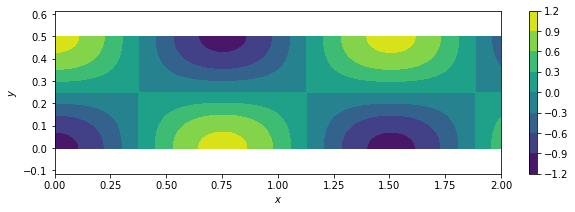

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
model.fields['phi'].plot(np.real(model.solution))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.colorbar()
plt.show()

In [3]:
model.solution[model.fields['T'].dofs]

array([ 2.07356238e-11-2.49065895e-11j,  4.63202462e-01+8.86252492e-01j,
       -7.69681807e-13+3.54660115e-10j,  1.78566921e-09-2.97382412e-10j,
       -7.17498407e-10-7.57273294e-11j])

In [4]:
model.solution[model.fields['R'].dofs]

array([ 2.75769337e-12-6.43378005e-12j, -1.44302239e-09+6.25105625e-11j,
        1.56325331e-10+2.28609393e-10j,  3.80664782e-10+1.38385989e-09j,
        6.93282528e-11+1.39759907e-10j])

In [5]:
from numpy.lib.scimath import sqrt

H = 0.5
c0 = 1.0
u0n = 0.0
L = 2

m = np.arange(num_modes)
k_tau = m*np.pi/H
k_o = np.conj((+c0*sqrt(omega**2-(c0**2-u0n**2)*k_tau**2)-u0n*omega)/(c0**2-u0n**2))
k_i = np.conj((-c0*sqrt(omega**2-(c0**2-u0n**2)*k_tau**2)-u0n*omega)/(c0**2-u0n**2))

T_ref = (-1)**mode_m*np.exp(-1j*k_o[mode_m]*L)
T = model.solution[model.fields['T'].dofs][mode_m]

print(T_ref)
print(T)
print(np.abs((T-T_ref)/T_ref)*100)

(0.4632027625966408+0.8862523346783578j)
(0.4632024615430116+0.8862524920249849j)
3.3969287407520085e-05


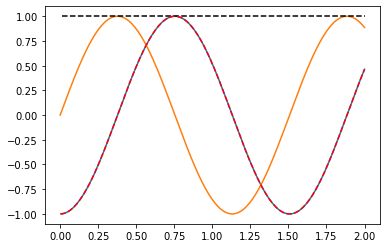

In [6]:
x = np.linspace(0, 2, 200)
line_x = mesh.locate_points(np.array([x, x*0+1.e-10]))
px = model.fields['phi'].sample(line_x, model.solution)

plt.figure()
plt.plot(x, px.real)
plt.plot(x, px.imag)
plt.plot(x, np.abs(px), 'k--')
plt.plot(x, (-1)**mode_m*np.exp(-1j*k_i[mode_m]*(-x)).real, 'r--')
plt.show()

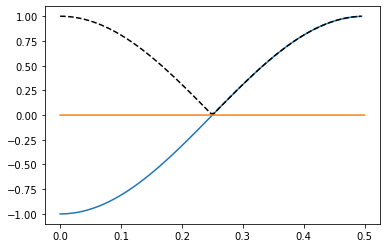

In [7]:
y = np.linspace(0, 0.5, 100)
line_y = mesh.locate_points(np.array([y*0+1.e-10, y]))
py = model.fields['phi'].sample(line_y, model.solution)

plt.figure()
plt.plot(y, py.real)
plt.plot(y, py.imag)
plt.plot(y, np.abs(py), 'k--')
plt.show()

In [8]:
model.solution[model.fields['T'].dofs]

array([ 2.07356238e-11-2.49065895e-11j,  4.63202462e-01+8.86252492e-01j,
       -7.69681807e-13+3.54660115e-10j,  1.78566921e-09-2.97382412e-10j,
       -7.17498407e-10-7.57273294e-11j])